In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing Necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.decomposition import PCA

import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

#load dataset
data = pd.read_csv("creditcard.csv")

In [4]:
print(data.shape)

(284807, 31)


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# Dataset informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Data exploration and analysis

# Checking the number of missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Data Preprocessing
data['Time'] = pd.to_datetime(data['Time'])

# Defining features (X) and target variable (y)
X = data.drop(['Class'], axis=1)  # Features
y = data['Class']  # Target variable

# Removing constant features
data = data.loc[:, data.apply(pd.Series.nunique) != 1]

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1970-01-01 00:00:00.000094813,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
min,1970-01-01 00:00:00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,1970-01-01 00:00:00.000054201,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1970-01-01 00:00:00.000084692,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1970-01-01 00:00:00.000139320,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,1970-01-01 00:00:00.000172792,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000
std,NaN,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527


In [10]:
# The distribution of legit transactions and fraudulent transactions 
data['Class'].value_counts()

# This dataset is highly imbalanced
# 0 --> Normal transactions
# 1 --> Fraudulent transaction

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
# Calculating percentages of Legit and fraudulent transactions
non_fraudulent_percent = (data['Class'].value_counts()[0] / len(data)) * 100
fraudulent_percent = (data['Class'].value_counts()[1] / len(data)) * 100
print(non_fraudulent_percent)
print(fraudulent_percent)


99.82725143693798
0.1727485630620034


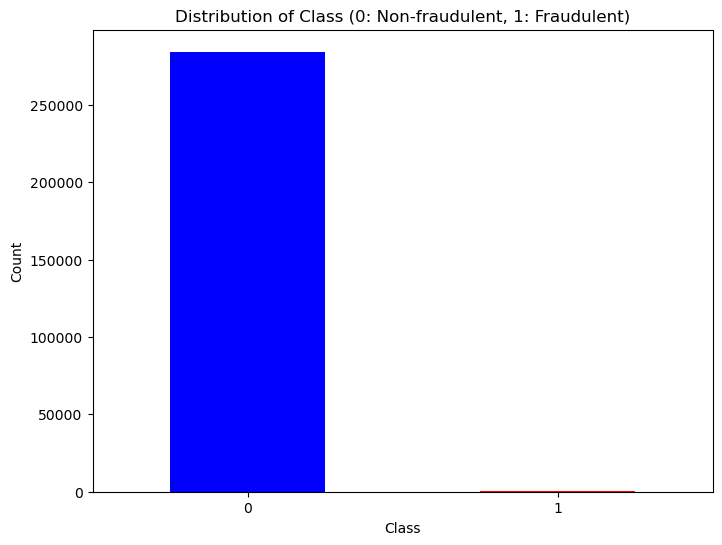

In [12]:
# Visualize the distribution of 'Class' (target variable)
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

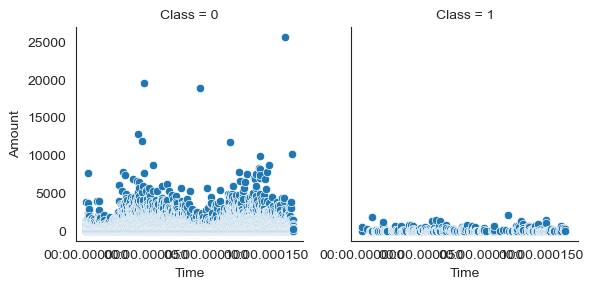

In [13]:
#Understanding patterns and relationships in the data
sns.set_style(style='white')
facet_grid = sns.FacetGrid(data=data, col='Class')
facet_grid.map(sns.scatterplot, 'Time', 'Amount', palette='Paired_r')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [14]:
# diffrentiating the fraud and legit data.
fraud = data[data['Class'] == 1]
legit = data[data['Class'] == 0]

In [15]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

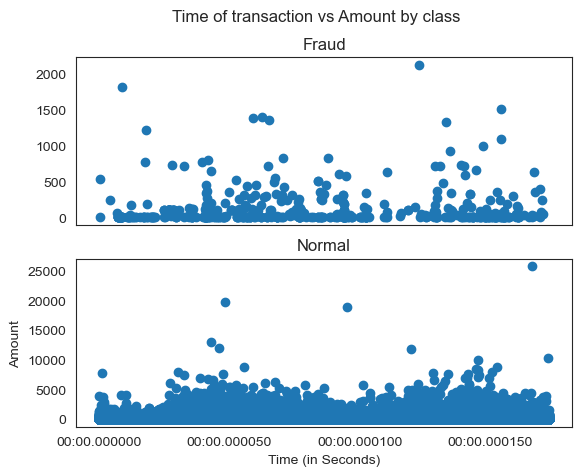

In [17]:
# Checking the fraudulent transactions occur more often during certain time frame

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [18]:
# Feature Engineering
# Add new features
X['Transaction_hour'] = pd.to_datetime(X['Time'], unit='s').dt.hour
X['Normalized_amount'] = (X['Amount'] - X['Amount'].mean()) / X['Amount'].std()

#X = X.drop(['Time'], axis=1)

In [19]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE
# Converting 'Time' feature to numerical format (e.g., seconds)
X['Time_seconds'] = (X['Time'] - X['Time'].min()).dt.total_seconds()

# Dropping the original 'Time' feature
X = X.drop(['Time'], axis=1)

# Now, we can proceed with SMOTE oversampling

# Using SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

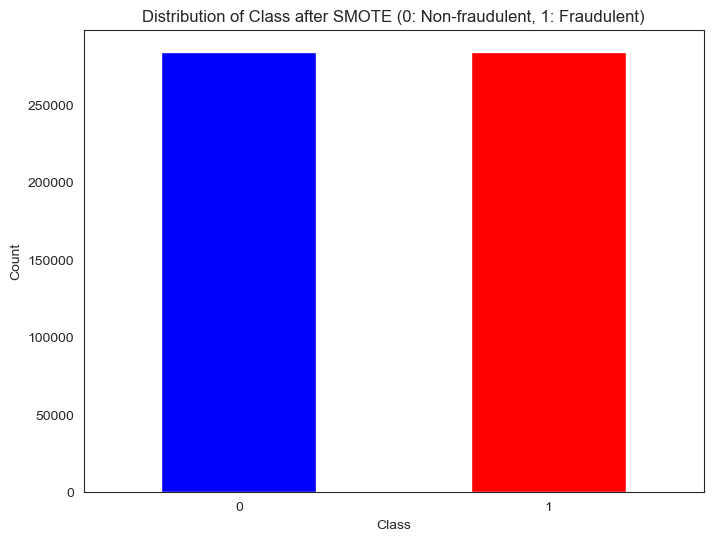

In [20]:
# Visualizing the distribution of 'Class' (target variable) after SMOTE
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class after SMOTE (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [21]:
# Feature Selection
# Selecting features
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                    'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                    'Transaction_hour', 'Normalized_amount']

In [22]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif


# Perform PCA for dimensionality reduction
n_components = min(X.shape[0], X.shape[1])  
pca = PCA(n_components=n_components)  
X_pca = pca.fit_transform(X)

# Perform feature selection on the PCA-transformed data
k_best_selector = SelectKBest(score_func=f_classif, k=5)  
X_k_best = k_best_selector.fit_transform(X_pca, y)

# Get the indices of selected features
selected_indices = k_best_selector.get_support(indices=True)

# Map selected PCA components back to original feature names
selected_features = [selected_features[i] for i in selected_indices]

print("Selected features using ANOVA F-test after PCA:")
print(selected_features)

Selected features using ANOVA F-test after PCA:
['V2', 'V3', 'V4', 'V5', 'V8']


In [23]:
X=X[selected_features]
X.head()

,V2,V3,V4,V5,V8
0,-0.072781,2.536347,1.378155,-0.338321,0.098698
1,0.266151,0.166480,0.448154,0.060018,0.085102
2,-1.340163,1.773209,0.379780,-0.503198,0.247676
3,-0.185226,1.792993,-0.863291,-0.010309,0.377436
4,0.877737,1.548718,0.403034,-0.407193,-0.270533


In [24]:
# Splitting the SMOTE-resampled data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Training the model on the training data
logistic_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_logistic = logistic_model.predict(X_test)

In [26]:
# Evaluating the model

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_logistic)
print("Classification Report:\n", class_report_logistic)

Logistic Regression Model Evaluation:
Accuracy: 0.9216801786750611
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     56750
           1       0.94      0.90      0.92     56976

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



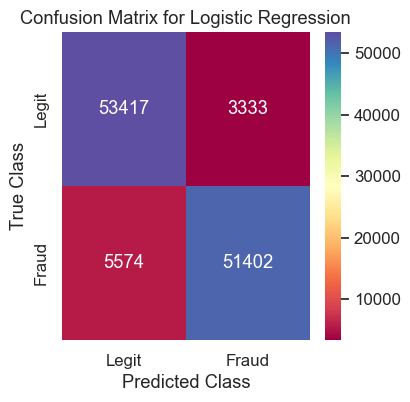

In [36]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(conf_matrix_logistic, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [28]:
# Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", np.mean(cv_scores))

Cross-validation Scores: [0.99716424 0.99701036 0.99698838 0.99716424 0.99659266]
Mean Cross-validation Score: 0.9969839781771089


In [40]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Random Forest Classifier Model Evaluation:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Random Forest Classifier Model Evaluation:
Accuracy: 0.997617079647574
Confusion Matrix:
 [[56532   218]
 [   53 56923]]


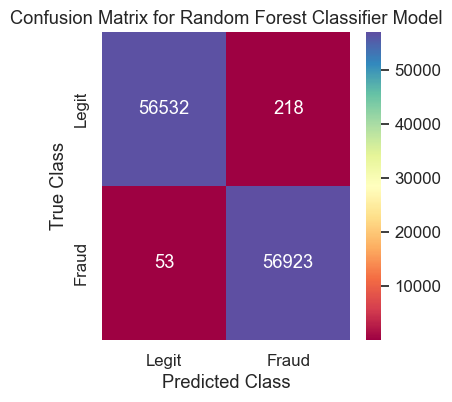

In [42]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(conf_matrix, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest Classifier Model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score

# Assuming model is your trained classifier
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9999254330132975


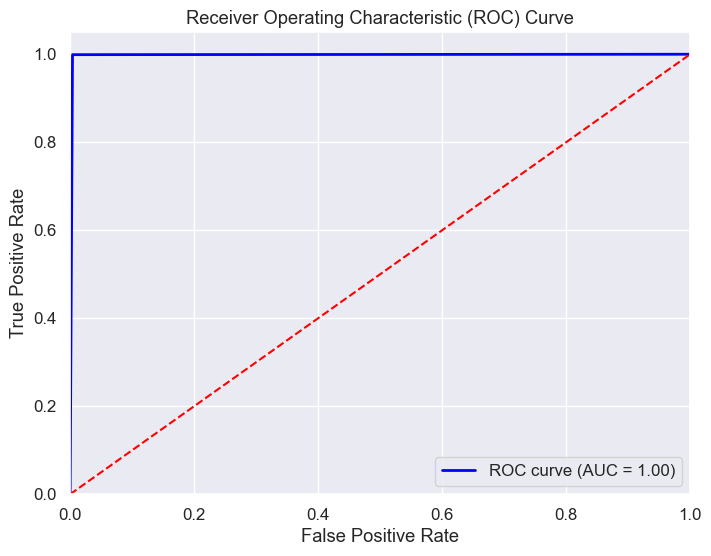

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

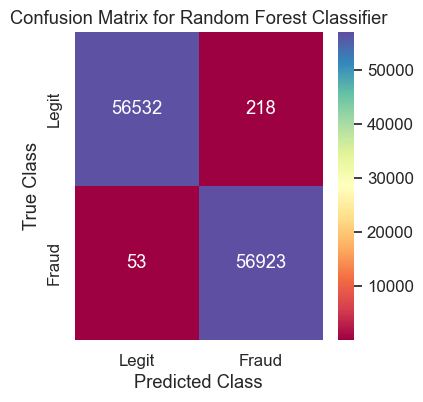

In [48]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(conf_matrix, cmap='Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [50]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [1, 5, 10],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


In [52]:
# Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9969400137171799
Confusion Matrix:
 [[56529   221]
 [  127 56849]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [58]:
# Saving the best model
joblib.dump(best_model, 'credit_card_fraud_detection_model.pkl')

['credit_card_fraud_detection_model.pkl']

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Additional Visualizations
# Visualize the distribution of 'Class' (target variable)
plt.figure(figsize=(8, 6))
data['Class'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('class_distribution.jpg')  # Save the visualization as a JPEG image
plt.close()

# Creating a heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.jpg')  # Save the visualization as a JPEG image
plt.close()

# Scatter plot to visualize the actual vs. predicted classes for test data
plt.figure(figsize=(15, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', marker='o', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', marker='x', label='Predicted')
plt.xlabel('Transaction Index')
plt.ylabel('Class (0: Non-fraudulent, 1: Fraudulent)')
plt.title('Actual vs. Predicted Classes for Test Data')
plt.legend()
plt.savefig('actual_vs_predicted.jpeg')  
plt.close()

# Plot the transaction volume over time
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Amount'], color='blue', alpha=0.5)
plt.title('Transaction Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.savefig('transaction_volume_over_time.jpeg')  
plt.close()

# Provide links to download each image
print("Download Class Distribution visualization: class_distribution.jpg")
print("Download Correlation Matrix visualization: correlation_matrix.jpg")
print("Download Actual vs. Predicted visualization: actual_vs_predicted.jpg")
print("Download Transaction Volume Over Time visualization: transaction_volume_over_time.jpg")

Download Class Distribution visualization: class_distribution.jpg
Download Correlation Matrix visualization: correlation_matrix.jpg
Download Actual vs. Predicted visualization: actual_vs_predicted.jpg
Download Transaction Volume Over Time visualization: transaction_volume_over_time.jpg
